The primary business objective of this predictive model is to:
# Predict student stress from personal, academic, and lifestyle data to guide early, targeted support that will improve mental health and academic performance.

This model can help:

Universities / Schools → detect students at risk of high stress early and provide counseling, mentoring, or flexible learning support.

Healthcare / Wellness programs → design targeted wellness workshops, stress-management courses, and lifestyle advice.

Policy makers → allocate resources to mental health programs in education systems.



# Imports

In [43]:
import pandas as pd
import numpy as np

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


# Load Data

In [45]:
# Load the CSV file

data = pd.read_csv('StressLevelDataset.csv')

In [46]:
# Display the first few rows of the dataset to understand its structure
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [47]:
data.shape

(1100, 21)

In [48]:
# Check Null Values
data.isnull().values.any()

np.False_

In [49]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 0 missing values in data frame


In [50]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [51]:
len(data)

1100

# EDA- *Distributions*

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

Define Numerical Columns for Distribution Plots

In [53]:
# Define columns to plot: exclude categorical columns
numerical_columns = ['anxiety_level', 'self_esteem', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

EDA – Histograms of Numerical Features

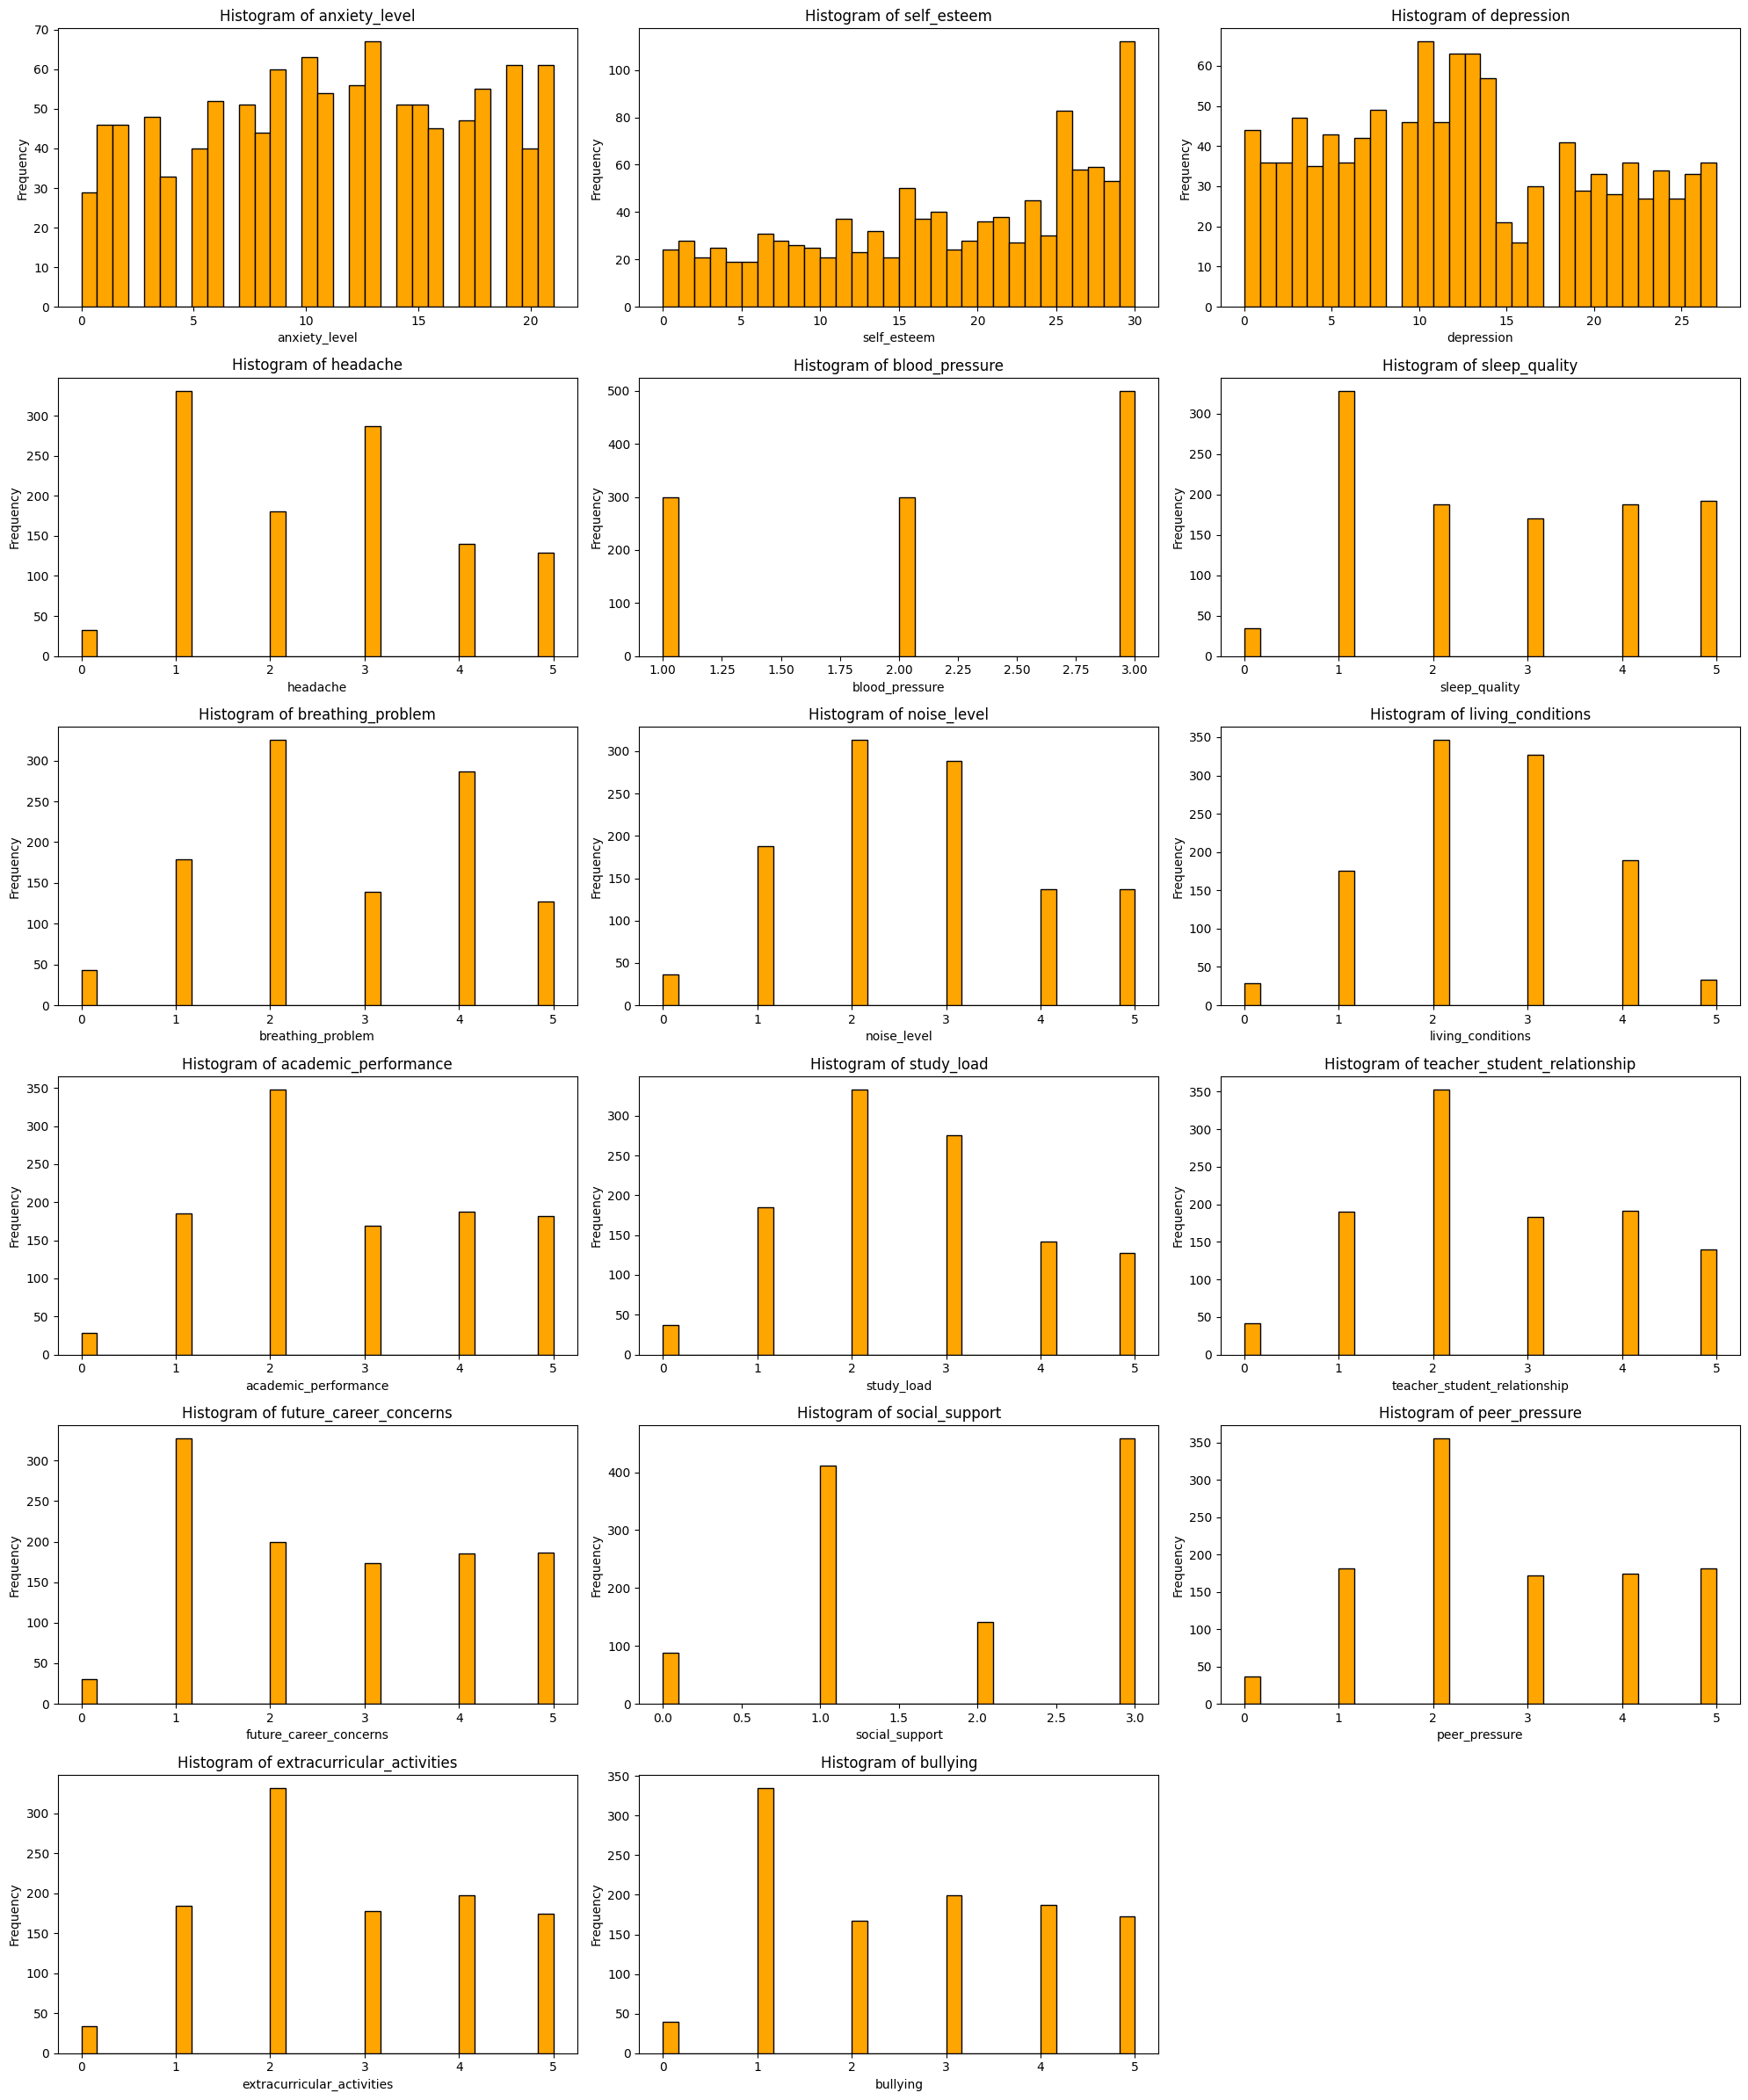

In [54]:
# Create a grid for the plots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through the numerical columns and plot the histograms
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [55]:
print(data.columns)

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


EDA – Categorical Distribution: mental_health_history

/tmp/ipython-input-3993992491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='mental_health_history', palette='Set2')


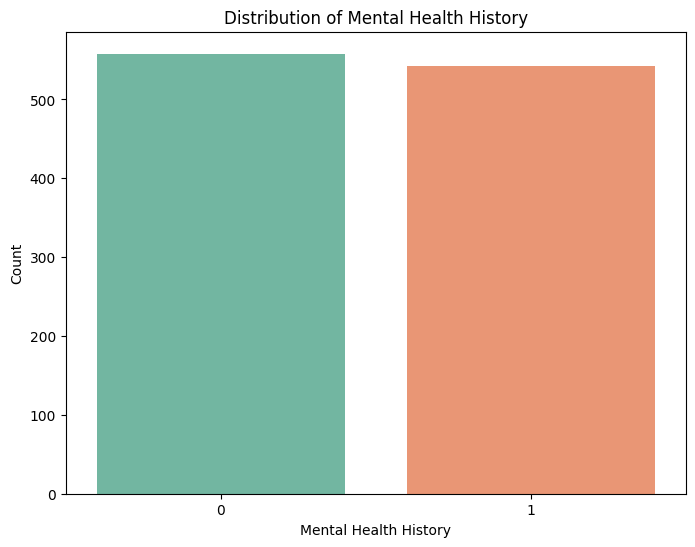

In [56]:
# Create a histogram for the 'mental_health_history' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='mental_health_history', palette='Set2')
plt.title('Distribution of Mental Health History')
plt.xlabel('Mental Health History')
plt.ylabel('Count')
plt.show()

EDA — Correlation Overview

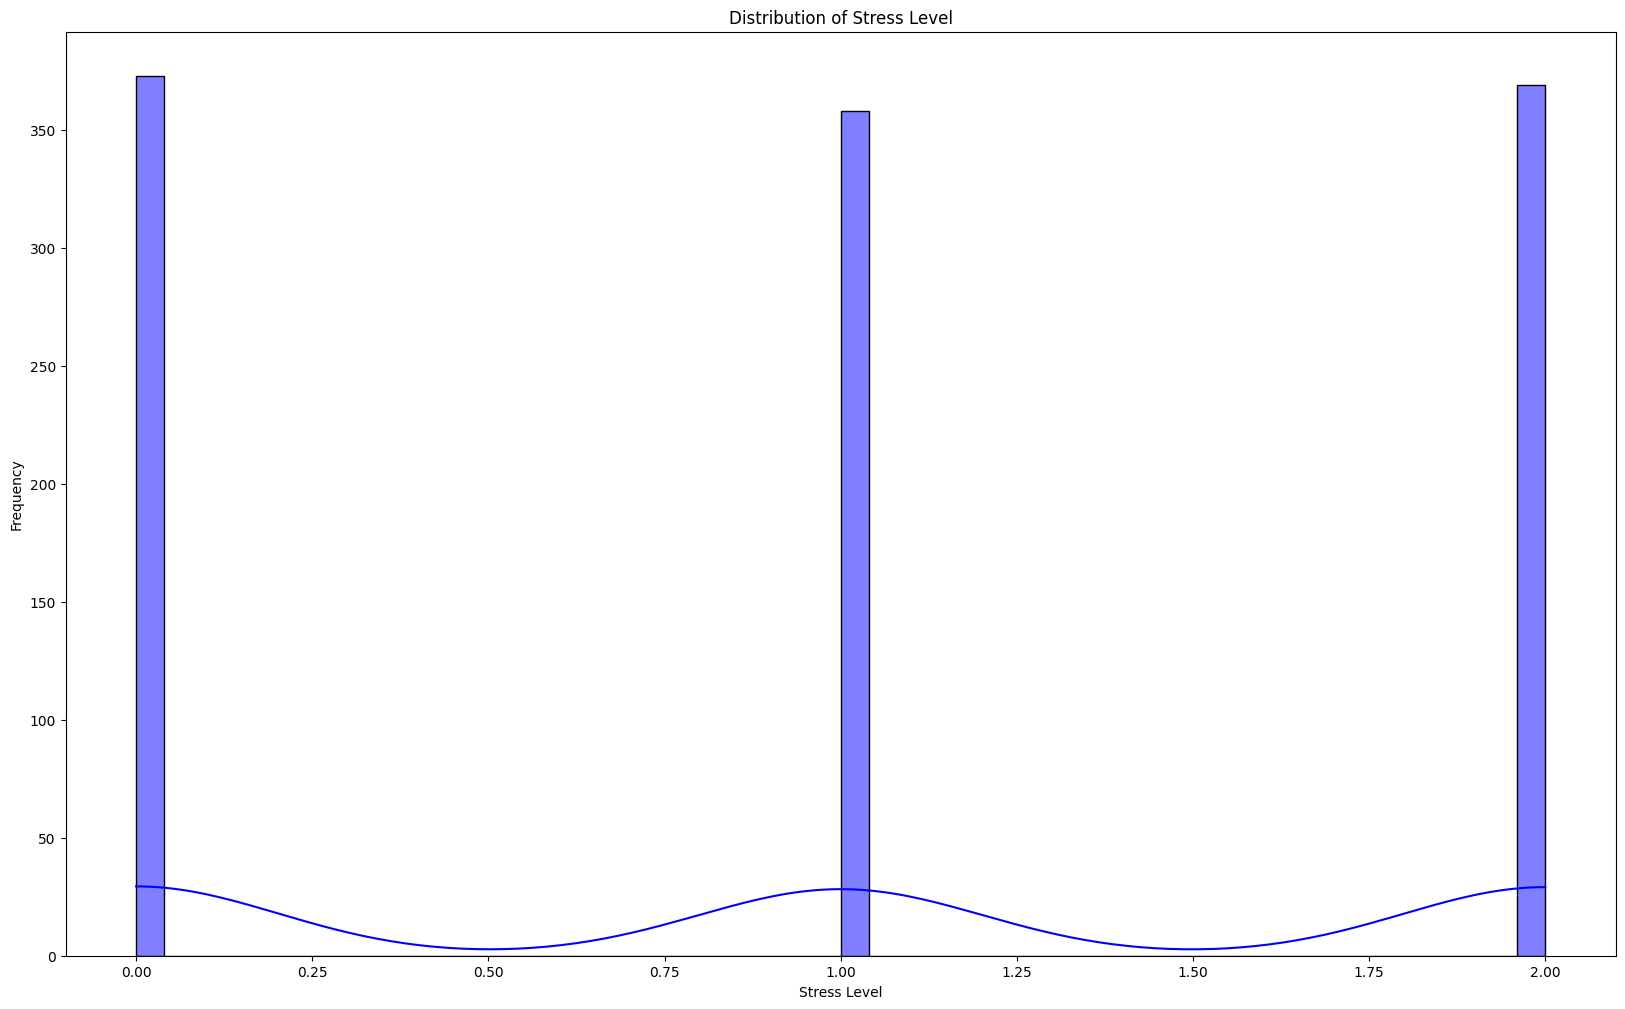

In [57]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['stress_level'], kde=True, color='blue', bins=50)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

In [58]:
print(data.columns)

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


In [59]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

In [60]:
# Display the correlation matrix
display(correlation_matrix)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.672745,0.634450,0.694340,0.632738,0.330867,-0.710292,0.561654,0.608624,-0.568434,...,-0.637079,-0.649601,0.586064,-0.663176,0.717016,-0.569748,0.642910,0.641022,0.709982,0.736795
self_esteem,-0.672745,1.000000,-0.603502,-0.699602,-0.626058,-0.514692,0.662693,-0.510514,-0.571169,0.550535,...,0.631212,0.639045,-0.575112,0.652934,-0.712520,0.679211,-0.607118,-0.641202,-0.640737,-0.756195
mental_health_history,0.634450,-0.603502,1.000000,0.615882,0.604826,0.295617,-0.614146,0.464347,0.515290,-0.508525,...,-0.601196,-0.586193,0.532267,-0.587728,0.625909,-0.482560,0.580602,0.554576,0.624366,0.648644
depression,0.694340,-0.699602,0.615882,1.000000,0.657700,0.436084,-0.693161,0.522540,0.566250,-0.530351,...,-0.608776,-0.633174,0.602498,-0.673853,0.706561,-0.617972,0.635544,0.648551,0.665790,0.734379
headache,0.632738,-0.626058,0.604826,0.657700,1.000000,0.361986,-0.638771,0.461719,0.543557,-0.532825,...,-0.623199,-0.622059,0.542890,-0.625928,0.679307,-0.572988,0.622581,0.582562,0.609775,0.713484
blood_pressure,0.330867,-0.514692,0.295617,0.436084,0.361986,1.000000,-0.300323,0.162308,0.352744,-0.274686,...,-0.280590,-0.262785,0.348964,-0.352123,0.434087,-0.752531,0.401392,0.426254,0.370440,0.394200
sleep_quality,-0.710292,0.662693,-0.614146,-0.693161,-0.638771,-0.300323,1.000000,-0.541687,-0.576645,0.535462,...,0.620955,0.671326,-0.551775,0.677569,-0.682130,0.554553,-0.649098,-0.623092,-0.699427,-0.749068
breathing_problem,0.561654,-0.510514,0.464347,0.522540,0.461719,0.162308,-0.541687,1.000000,0.459235,-0.448997,...,-0.508172,-0.507251,0.428791,-0.498895,0.545345,-0.365173,0.492729,0.516884,0.576341,0.573984
noise_level,0.608624,-0.571169,0.515290,0.566250,0.543557,0.352744,-0.576645,0.459235,1.000000,-0.452362,...,-0.572327,-0.513730,0.493625,-0.538758,0.575439,-0.492094,0.583817,0.563614,0.585458,0.663371
living_conditions,-0.568434,0.550535,-0.508525,-0.530351,-0.532825,-0.274686,0.535462,-0.448997,-0.452362,1.000000,...,0.503275,0.507221,-0.437732,0.549332,-0.565071,0.466594,-0.501795,-0.515794,-0.551139,-0.581723


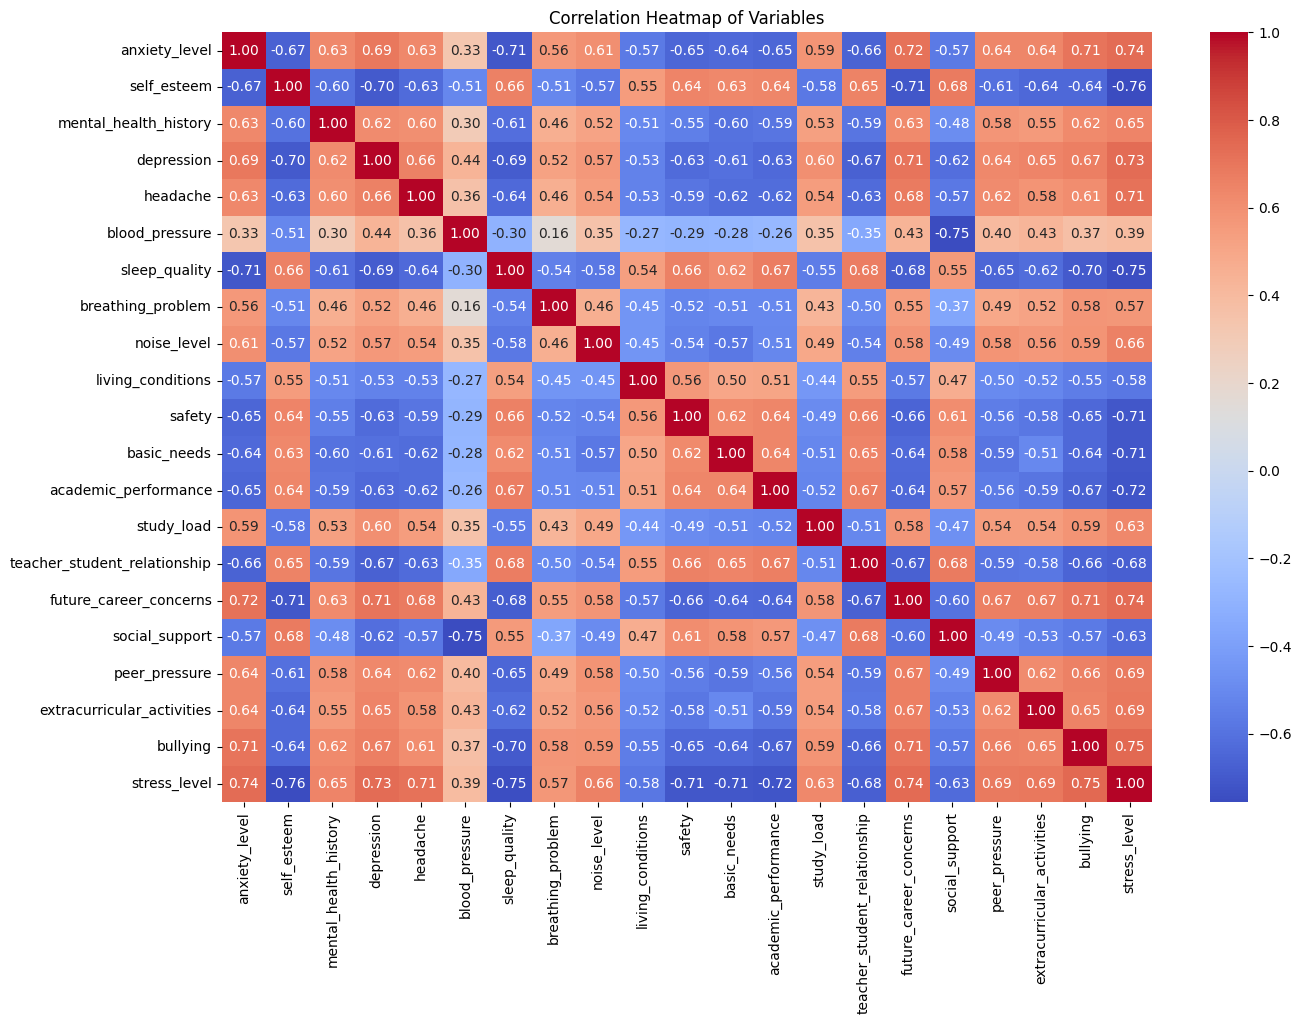

In [61]:
# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

EDA – Feature Correlation with Target

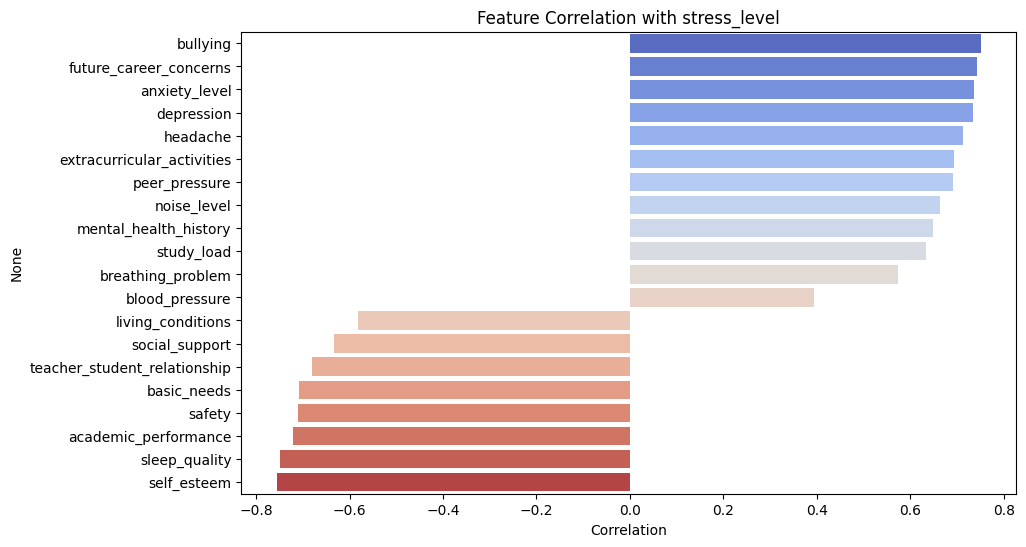

In [62]:
# Define features (X) and target (y)
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# 1. Correlation with Target
corr_with_target = pd.DataFrame(X.corrwith(y), columns=["Correlation"])
corr_with_target = corr_with_target.sort_values(by="Correlation", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Correlation", y=corr_with_target.index, data=corr_with_target, palette="coolwarm", hue=corr_with_target.index, legend=False)
plt.title("Feature Correlation with stress_level")
plt.show()

#  Feature/Target Split and Train/Test Split

In [63]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (880, 20)
Shape of X_test: (220, 20)
Shape of y_train: (880,)
Shape of y_test: (220,)


## Define Feature Types for Preprocessing

In [64]:
# Identify numerical features
numerical_features = data.select_dtypes(include=np.number).columns.tolist()

# Identify categorical features (based on previous analysis, only 'mental_health_history' is treated as categorical)
categorical_features = ['mental_health_history']

# Exclude the target variable from the features lists
if 'stress_level' in numerical_features:
    numerical_features.remove('stress_level')

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
Categorical features: ['mental_health_history']


# Preprocessing Pipelines & ColumnTransformer

In [65]:
# Create a pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a pipeline for the categorical feature 'mental_health_history'
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [66]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [67]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("Shape of preprocessed X_train:", X_train_preprocessed.shape)
print("Shape of preprocessed X_test:", X_test_preprocessed.shape)

Shape of preprocessed X_train: (880, 22)
Shape of preprocessed X_test: (220, 22)


# Train & Evaluate

In [68]:
# Initialize the different regression models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [69]:
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_preprocessed, y_train)

    # Make predictions
    y_pred = model.predict(X_test_preprocessed)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Store the results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2,
        'MAPE': mape
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

--- Random Forest ---
MAE: 0.1316
MSE: 0.1278
RMSE: 0.3574
R-squared: 0.8086
MAPE: 265507668940887.9375


--- SVR ---
MAE: 0.1826
MSE: 0.1608
RMSE: 0.4010
R-squared: 0.7592
MAPE: 332328851458229.4375


--- Linear Regression ---
MAE: 0.1980
MSE: 0.1408
RMSE: 0.3752
R-squared: 0.7892
MAPE: 364462330318680.4375


--- Decision Tree ---
MAE: 0.1500
MSE: 0.2227
RMSE: 0.4719
R-squared: 0.6664
MAPE: 348005425751356.5000


--- XGBoost ---
MAE: 0.1388
MSE: 0.1494
RMSE: 0.3865
R-squared: 0.7762
MAPE: 280250625818624.0000




# Select Model for tuning

In [70]:
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "SVR": {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.5],
        'kernel': ['linear', 'rbf']
    },
    "Linear Regression": {}, # No hyperparameters to tune
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

In [71]:
tuned_models = {}

for name, model in models.items():
    if name in param_grids and param_grids[name]:
        print(f"Tuning hyperparameters for {name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
        grid_search.fit(X_train_preprocessed, y_train)
        tuned_models[name] = grid_search.best_estimator_
        print(f"Tuning complete for {name}. Best parameters: {grid_search.best_params_}")
    else:
        print(f"No tuning performed for {name} (no parameter grid defined or grid is empty).")
        tuned_models[name] = model

models = tuned_models

Tuning hyperparameters for Random Forest...
Tuning complete for Random Forest. Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Tuning hyperparameters for SVR...
Tuning complete for SVR. Best parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
No tuning performed for Linear Regression (no parameter grid defined or grid is empty).
Tuning hyperparameters for Decision Tree...
Tuning complete for Decision Tree. Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Tuning hyperparameters for XGBoost...
Tuning complete for XGBoost. Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [72]:
tuned_results = {}

for name, model in models.items():
    # Make predictions
    y_pred_tuned = model.predict(X_test_preprocessed)

    # Evaluate the tuned model
    mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
    mse_tuned = mean_squared_error(y_test, y_pred_tuned)
    rmse_tuned = np.sqrt(mse_tuned)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    mape_tuned = mean_absolute_percentage_error(y_test, y_pred_tuned)


    # Store the results
    tuned_results[name] = {
        'MAE': mae_tuned,
        'MSE': mse_tuned,
        'RMSE': rmse_tuned,
        'R-squared': r2_tuned,
        'MAPE': mape_tuned
    }

# Display the tuned results
print("--- Tuned Model Performance ---")
for name, metrics in tuned_results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

--- Tuned Model Performance ---
--- Random Forest ---
MAE: 0.1298
MSE: 0.1240
RMSE: 0.3521
R-squared: 0.8143
MAPE: 259393034009979.1875


--- SVR ---
MAE: 0.1424
MSE: 0.1237
RMSE: 0.3517
R-squared: 0.8147
MAPE: 280220991260412.9375


--- Linear Regression ---
MAE: 0.1980
MSE: 0.1408
RMSE: 0.3752
R-squared: 0.7892
MAPE: 364462330318680.4375


--- Decision Tree ---
MAE: 0.1571
MSE: 0.2074
RMSE: 0.4554
R-squared: 0.6893
MAPE: 270021016619399.9062


--- XGBoost ---
MAE: 0.1404
MSE: 0.1432
RMSE: 0.3785
R-squared: 0.7855
MAPE: 289301682192384.0000




# Hyperparameter Tuning

In [73]:
# Define hyperparameter grids for each model

param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "SVR": {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.5],
        'kernel': ['linear', 'rbf']
    },
    "Linear Regression": {
        # Linear Regression typically doesn't have hyperparameters to tune with GridSearchCV in this manner
        # We can leave this empty or add a dummy parameter if needed for a loop
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

print("Hyperparameter grids defined.")

Hyperparameter grids defined.


In [74]:
tuned_models = {}
best_params = {}
best_scores = {}

# Update models_to_tune to include all models
models_to_tune = models

for name, model in models_to_tune.items():
    if name in param_grids and param_grids[name]: # Check if parameter grid exists and is not empty
        print(f"Tuning {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_preprocessed, y_train)

        tuned_models[name] = grid_search.best_estimator_
        best_params[name] = grid_search.best_params_
        best_scores[name] = -grid_search.best_score_ # Convert to positive MSE

        print(f"Finished tuning {name}.")
        print(f"Best parameters for {name}: {best_params[name]}")
        print(f"Best cross-validation MSE for {name}: {best_scores[name]:.4f}")
        print("-" * 30)
    else:
        print(f"No parameter grid defined or grid is empty for {name}. Skipping tuning.")
        tuned_models[name] = model # Use the original model if no tuning is performed

print("\nHyperparameter tuning complete for all models.")

Tuning Random Forest...
Finished tuning Random Forest.
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation MSE for Random Forest: 0.1411
------------------------------
Tuning SVR...
Finished tuning SVR.
Best parameters for SVR: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Best cross-validation MSE for SVR: 0.1362
------------------------------
No parameter grid defined or grid is empty for Linear Regression. Skipping tuning.
Tuning Decision Tree...
Finished tuning Decision Tree.
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation MSE for Decision Tree: 0.2161
------------------------------
Tuning XGBoost...
Finished tuning XGBoost.
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation MSE for XGBoost: 0.1509
------------------------------

Hyperparameter tuning complete 

In [75]:
tuned_results = {}

for name, model in tuned_models.items():
    print(f"Evaluating tuned {name}...")
    # Make predictions with the tuned model
    y_pred_tuned = model.predict(X_test_preprocessed)

    # Evaluate the tuned model
    mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
    mse_tuned = mean_squared_error(y_test, y_pred_tuned)
    rmse_tuned = np.sqrt(mse_tuned)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    mape_tuned = mean_absolute_percentage_error(y_test, y_pred_tuned)

    # Store the results
    tuned_results[name] = {
        'MAE': mae_tuned,
        'MSE': mse_tuned,
        'RMSE': rmse_tuned,
        'R-squared': r2_tuned,
        'MAPE': mape_tuned
    }

    print(f"Finished evaluating tuned {name}.")
    print("-" * 30)

# Display the results
print("\nTuned Model Evaluation Results:")
for name, metrics in tuned_results.items():
    print(f"--- Tuned {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

Evaluating tuned Random Forest...
Finished evaluating tuned Random Forest.
------------------------------
Evaluating tuned SVR...
Finished evaluating tuned SVR.
------------------------------
Evaluating tuned Linear Regression...
Finished evaluating tuned Linear Regression.
------------------------------
Evaluating tuned Decision Tree...
Finished evaluating tuned Decision Tree.
------------------------------
Evaluating tuned XGBoost...
Finished evaluating tuned XGBoost.
------------------------------

Tuned Model Evaluation Results:
--- Tuned Random Forest ---
MAE: 0.1312
MSE: 0.1258
RMSE: 0.3547
R-squared: 0.8116
MAPE: 265855008036354.0312


--- Tuned SVR ---
MAE: 0.1424
MSE: 0.1237
RMSE: 0.3517
R-squared: 0.8147
MAPE: 280220991260412.9375


--- Tuned Linear Regression ---
MAE: 0.1980
MSE: 0.1408
RMSE: 0.3752
R-squared: 0.7892
MAPE: 364462330318680.4375


--- Tuned Decision Tree ---
MAE: 0.1571
MSE: 0.2074
RMSE: 0.4554
R-squared: 0.6893
MAPE: 270021016619399.9062


--- Tuned XGBoost -

# Compare Initial vs Tuned Performance

In [76]:
# Create DataFrames from the results dictionaries
initial_results_df = pd.DataFrame.from_dict(results, orient='index')
tuned_results_df = pd.DataFrame.from_dict(tuned_results, orient='index')

# Rename the index to 'Model'
initial_results_df.index.name = 'Model'
tuned_results_df.index.name = 'Model'

# Display the comparison
print("--- Model Performance Comparison ---")
print("\nInitial Model Performance:")
display(initial_results_df)

print("\nTuned Model Performance:")
display(tuned_results_df)

--- Model Performance Comparison ---

Initial Model Performance:


,MAE,MSE,RMSE,R-squared,MAPE
Model,,,,,
Random Forest,0.131591,0.127768,0.357446,0.808635,2.655077e+14
SVR,0.182634,0.160801,0.401000,0.759159,3.323289e+14
Linear Regression,0.198032,0.140769,0.375192,0.789162,3.644623e+14
Decision Tree,0.150000,0.222727,0.471940,0.666409,3.480054e+14
XGBoost,0.138808,0.149416,0.386544,0.776211,2.802506e+14



Tuned Model Performance:


,MAE,MSE,RMSE,R-squared,MAPE
Model,,,,,
Random Forest,0.131204,0.125814,0.354703,0.811561,2.658550e+14
SVR,0.142449,0.123721,0.351740,0.814696,2.802210e+14
Linear Regression,0.198032,0.140769,0.375192,0.789162,3.644623e+14
Decision Tree,0.157109,0.207422,0.455436,0.689332,2.700210e+14
XGBoost,0.141824,0.143195,0.378411,0.785529,2.892746e+14


# Performace Intertretation

In [77]:
for index, row in tuned_results_df.iterrows():
    print(f"{index}:")
    print(f"- R² score of {row['R-squared']:.2f} indicates that the model explains {row['R-squared']*100:.1f}% of variance in the target variable.")
    print(f"- MAE of {row['MAE']:.2f} shows the average magnitude of errors in predictions.")
    print(f"- RMSE of {row['RMSE']:.2f} emphasizes larger errors in predictions.")
    print("- Lower MAE and RMSE are better; higher R² is better.\n")

Random Forest:
- R² score of 0.81 indicates that the model explains 81.2% of variance in the target variable.
- MAE of 0.13 shows the average magnitude of errors in predictions.
- RMSE of 0.35 emphasizes larger errors in predictions.
- Lower MAE and RMSE are better; higher R² is better.

SVR:
- R² score of 0.81 indicates that the model explains 81.5% of variance in the target variable.
- MAE of 0.14 shows the average magnitude of errors in predictions.
- RMSE of 0.35 emphasizes larger errors in predictions.
- Lower MAE and RMSE are better; higher R² is better.

Linear Regression:
- R² score of 0.79 indicates that the model explains 78.9% of variance in the target variable.
- MAE of 0.20 shows the average magnitude of errors in predictions.
- RMSE of 0.38 emphasizes larger errors in predictions.
- Lower MAE and RMSE are better; higher R² is better.

Decision Tree:
- R² score of 0.69 indicates that the model explains 68.9% of variance in the target variable.
- MAE of 0.16 shows the avera

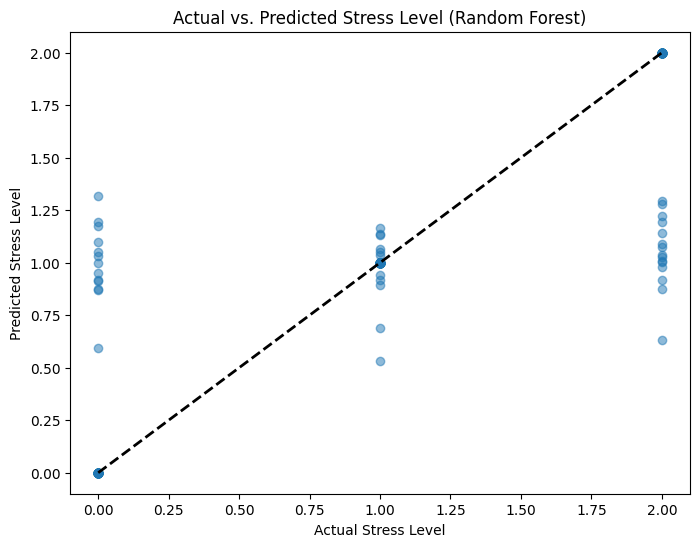

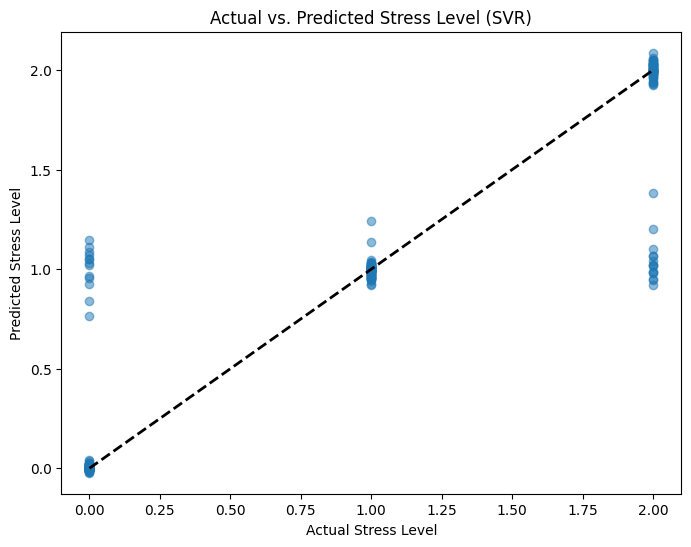

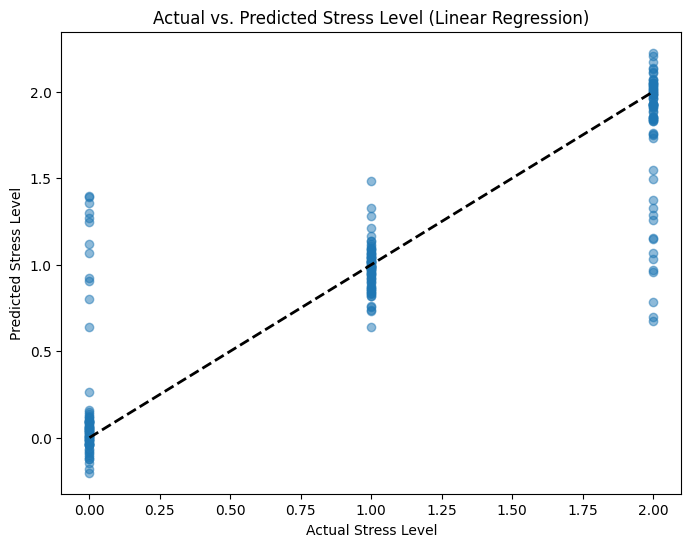

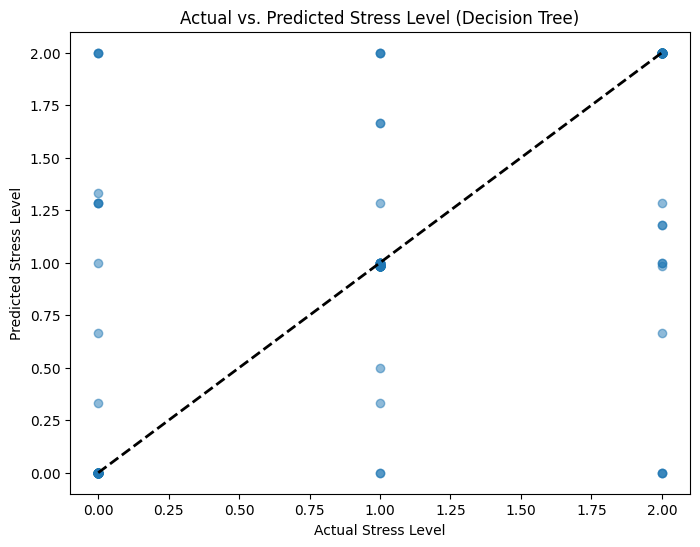

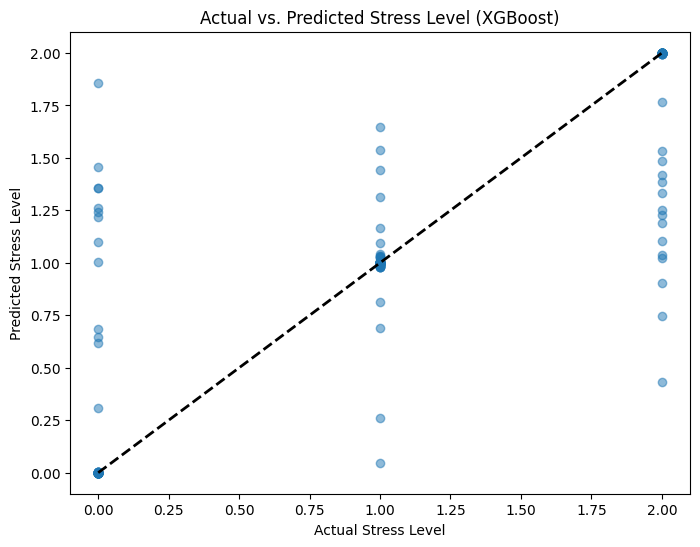

In [78]:
# Plotting Actual vs. Predicted values for each tuned model
for name, model in tuned_models.items():
    y_pred_tuned = model.predict(X_test_preprocessed)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_tuned, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.xlabel("Actual Stress Level")
    plt.ylabel("Predicted Stress Level")
    plt.title(f"Actual vs. Predicted Stress Level ({name})")
    plt.show()